    Obtencion de datos

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

In [4]:
# Cargar los datos
tabla = pd.read_csv('../CSV final/baseDatosFinal.csv')

# Contar las fechas
fechas = tabla['Year'].value_counts().reset_index()
fechas.columns = ['Año', 'Cantidad de Artículos']  # Renombrar columnas

# Lista de países
paises = [
    'Estados Unidos', 'Reino Unido', 'Canadá', 'Alemania', 
    'Francia', 'Italia', 'España', 'Brasil', 'México', 
    'Australia', 'India', 'Japón', 'China', 'Rusia', 'Sudáfrica'
]

# Asignar aleatoriamente un país a cada autor
np.random.seed(0)  # Para reproducibilidad
tabla['País'] = [random.choice(paises) for _ in range(len(tabla))]

# Crear el DataFrame para el gráfico    
pais_counts = tabla['País'].value_counts().reset_index()
pais_counts.columns = ['País', 'Cantidad de Autores']

Articulos mas citados

In [5]:
# Contar la cantidad de artículos por journal (ISSN)
journal_counts = tabla['ISSN'].value_counts().head(11).reset_index()

# Renombrar las columnas para mayor claridad
journal_counts.columns = ['ISSN', 'Cantidad de Artículos']

top_journals= journal_counts.iloc[1:11]
# Mostrar los 10 journals con más artículos
print(top_journals)

         ISSN  Cantidad de Artículos
1    03029743                    187
2   2169-3536                    174
3    15394565                    147
4    13602357                    124
5   0360-1315                    120
6    1942647X                    103
7   2212-8689                     99
8    18650929                     77
9    07356331                     77
10   21659559                     75


In [6]:

# Asegurarse de que la columna de "Article Citation Count" esté en formato numérico
tabla['Article Citation Count'] = tabla['Article Citation Count'].apply(pd.to_numeric, errors='coerce')


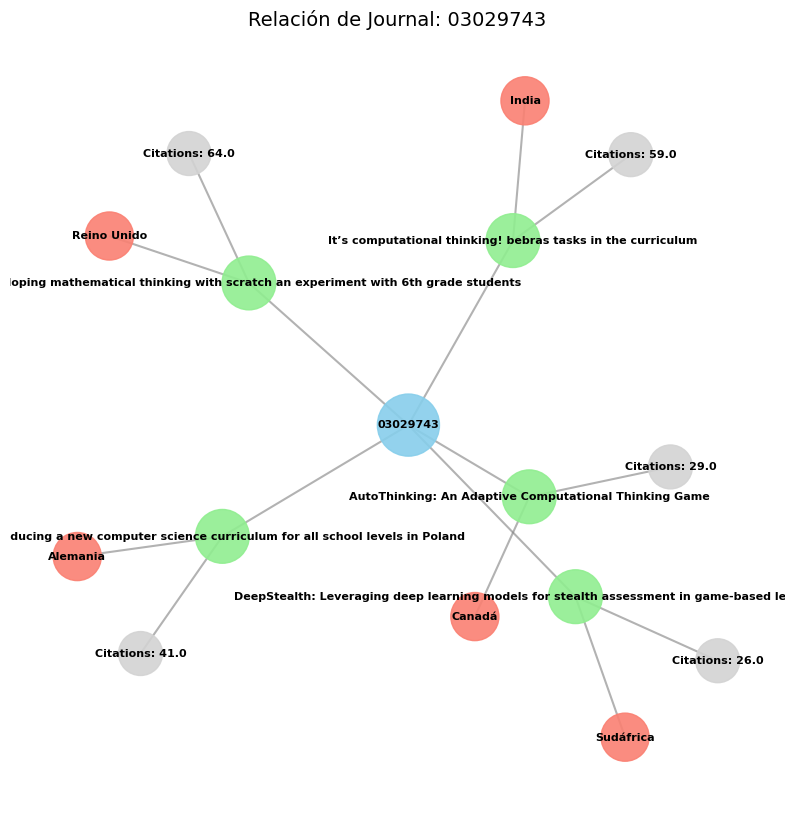

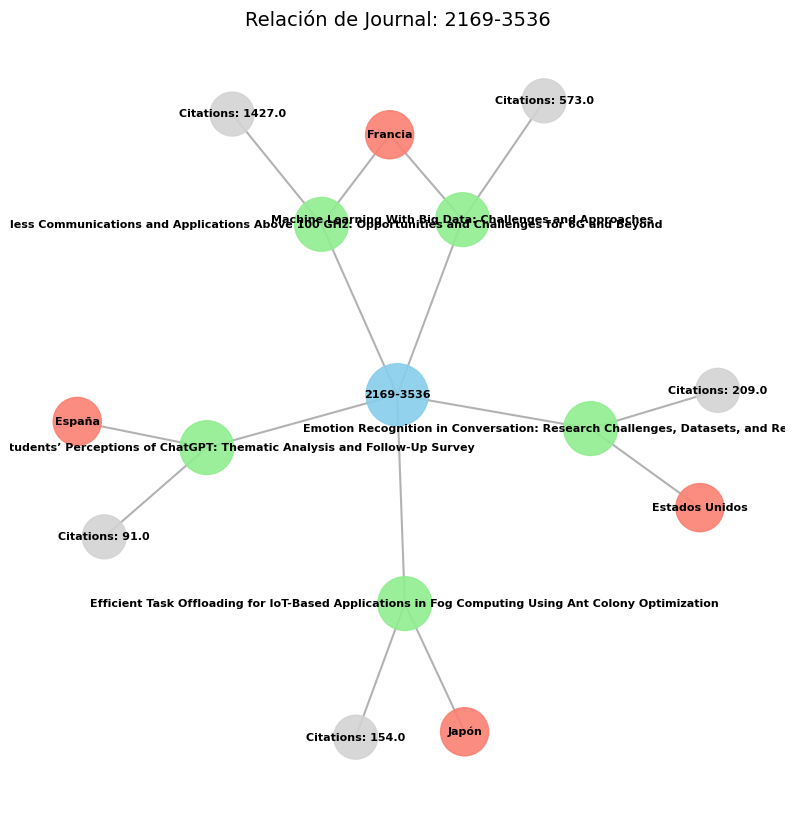

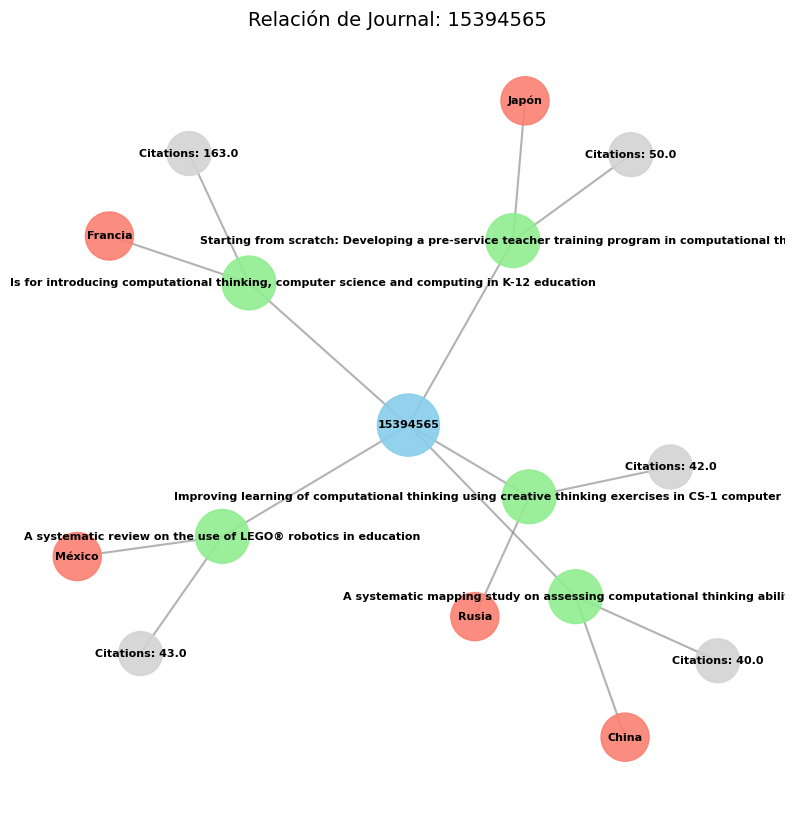

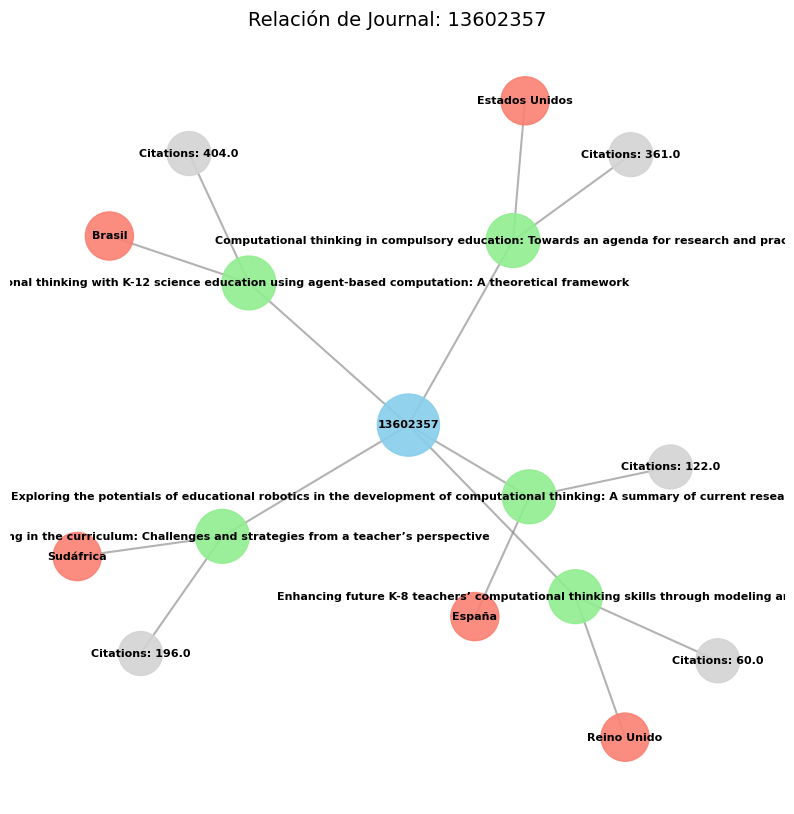

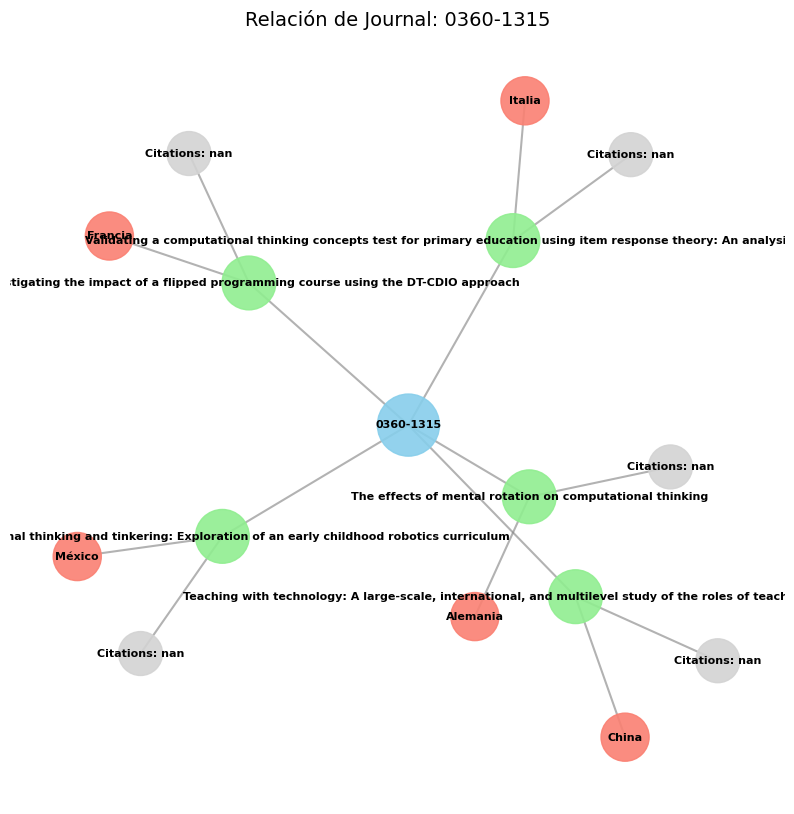

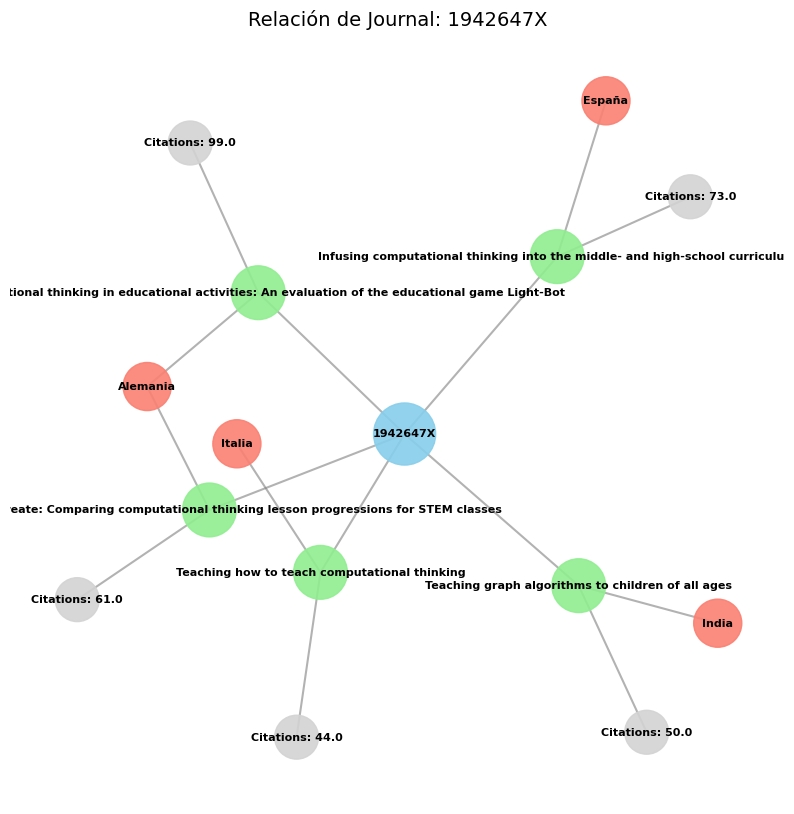

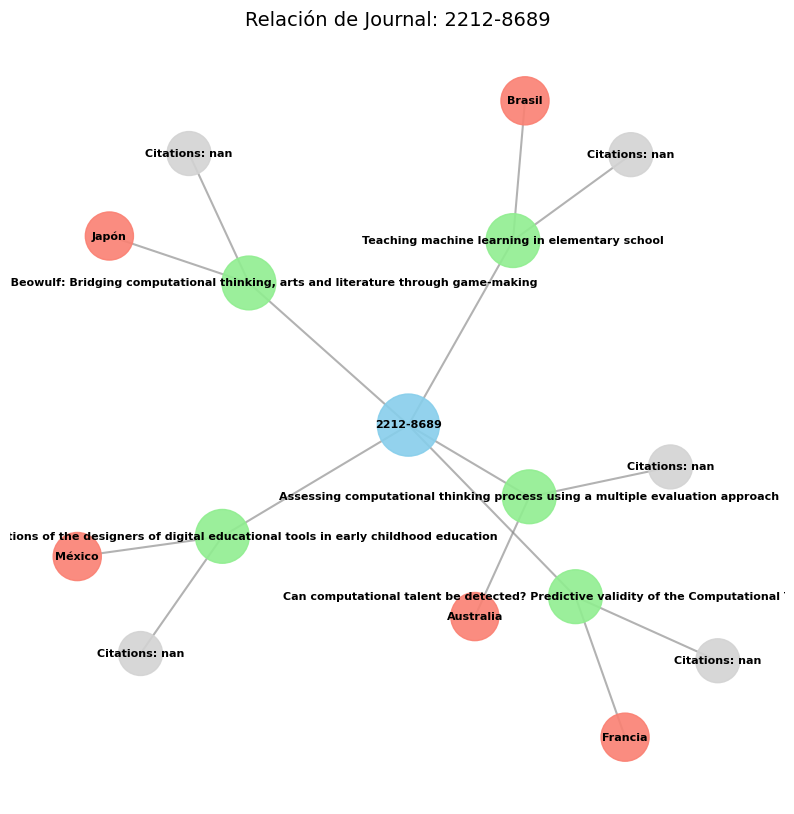

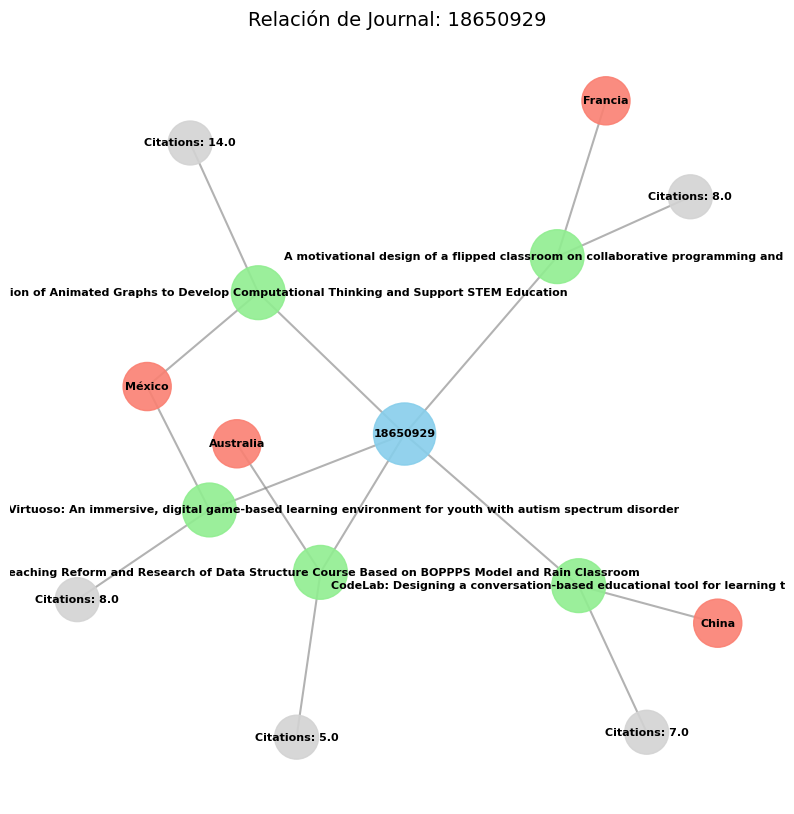

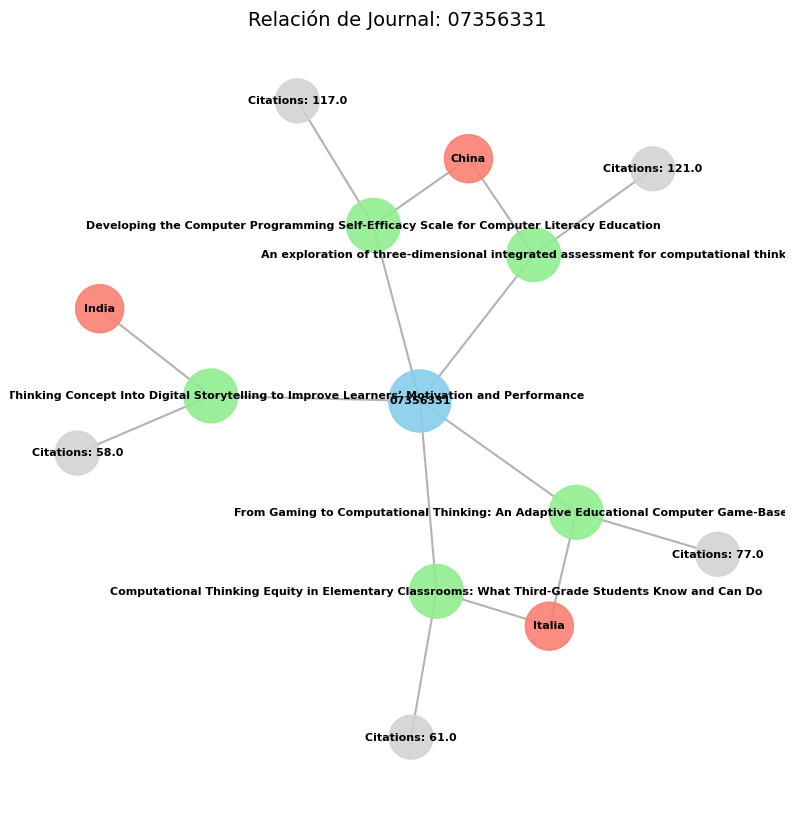

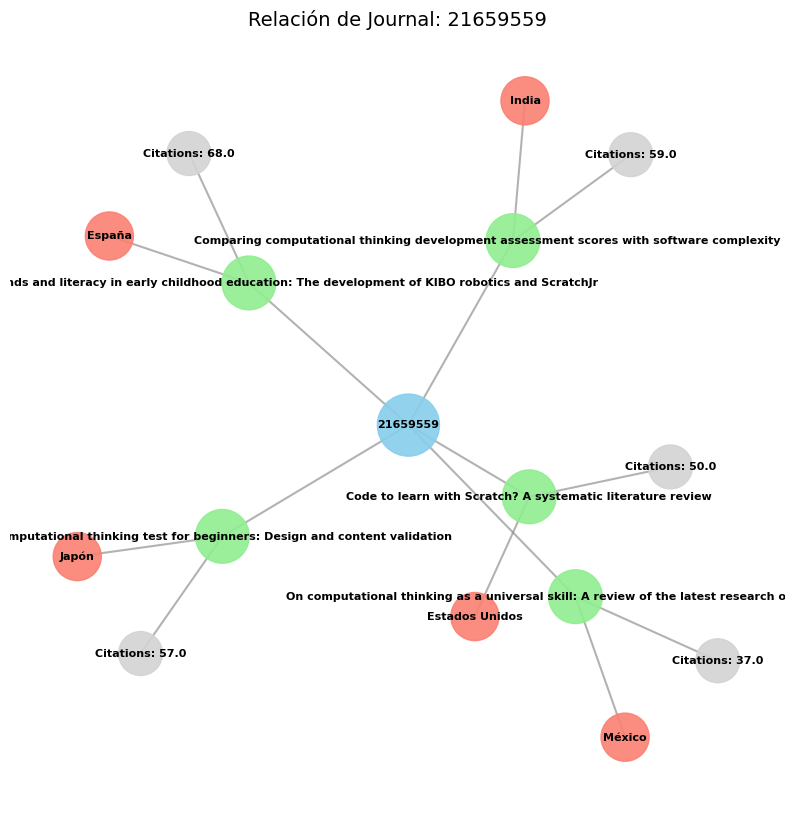

In [22]:


# Asignar aleatoriamente un país a cada autor (si no lo tienes ya)
np.random.seed(0)  # Para reproducibilidad
tabla['País'] = [random.choice(paises) for _ in range(len(tabla))]

# Contar la cantidad de artículos por journal (ISSN)
journal_counts = tabla['ISSN'].value_counts().reset_index()
journal_counts.columns = ['ISSN', 'Artículos']


# Crear los 10 grafos (uno para cada journal)
for _, row in top_journals.iterrows():
    # Filtrar artículos del journal
    journal_articles = tabla[tabla['ISSN'] == row['ISSN']]
    
    # Asignar citaciones aleatorias si no las tienes (en caso de que 'Article Citation Count' esté vacío)
    if 'Article Citation Count' not in journal_articles.columns:
        journal_articles['Article Citation Count'] = [random.randint(0, 250) for _ in range(len(journal_articles))]
    
    # Obtener los 15 artículos más citados
    top_articles = journal_articles.nlargest(5, 'Article Citation Count')
    
    # Asignar país aleatorio al primer autor (si no tienes país asignado)
    top_articles['País'] = [random.choice(paises) for _ in range(len(top_articles))]
    
    # Crear el grafo
    G = nx.Graph()
    
    # Añadir nodo para el journal
    journal_name = row['ISSN']
    G.add_node(journal_name, type='journal')
    
    # Añadir nodos para los artículos, sus países y nodos de citaciones
    for idx, article in top_articles.iterrows():
        article_name = article['Title']
        country = article['País']
        citation_count = article['Article Citation Count']
        
        # Nodo para cada artículo
        G.add_node(article_name, type='article')
        G.add_node(country, type='country')
        
        # Nodo para la cantidad de citaciones del artículo
        citation_node = f"{article_name}_Citations"
        G.add_node(citation_node, type='citation', label=f"Citations: {citation_count}")
        
        # Relación entre el journal y el artículo
        G.add_edge(journal_name, article_name)
        
        # Relación entre el artículo y el país del autor
        G.add_edge(article_name, country)
        
        # Relación entre el artículo y el nodo de citaciones
        G.add_edge(article_name, citation_node)
    
    # Dibuja el grafo en un layout circular
    plt.figure(figsize=(10, 10))  # Tamaño de la figura
    pos = nx.spring_layout(G, seed=42)  # Usamos un layout tipo "spring" para mejor visualización
    
    # Ajuste del tamaño y color de nodos
    node_colors = []
    node_sizes = []
    labels = {}
    for node in G.nodes(data=True):
        if node[1]['type'] == 'journal':
            node_colors.append('skyblue')
            node_sizes.append(2000)
            labels[node[0]] = node[0]
        elif node[1]['type'] == 'article':
            node_colors.append('lightgreen')
            node_sizes.append(1500)
            labels[node[0]] = node[0]
        elif node[1]['type'] == 'country':
            node_colors.append('salmon')
            node_sizes.append(1200)
            labels[node[0]] = node[0]
        elif node[1]['type'] == 'citation':
            node_colors.append('lightgrey')
            node_sizes.append(1000)
            labels[node[0]] = node[1]['label']  # Mostrar el número de citaciones
    
    # Dibujar nodos y etiquetas con los colores y tamaños
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_weight='bold')
    
    # Título y mostrar
    plt.title(f"Relación de Journal: {journal_name}", fontsize=14)
    plt.axis('off')
    plt.show()